In [184]:
import pandas as pd
import seaborn as sns
import category_encoders as ce

import nltk 
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif

hotdf = pd.read_csv('data/hotels.csv')
hotdf.head()

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng
0,Stratton Street Mayfair Westminster Borough Lo...,581,2/19/2016,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531 day,51.507894,-0.143671
1,130 134 Southampton Row Camden London WC1B 5AF...,299,1/12/2017,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,2,14,6.3,"[' Business trip ', ' Couple ', ' Standard Dou...",203 day,51.521009,-0.123097
2,151 bis Rue de Rennes 6th arr 75006 Paris France,32,10/18/2016,8.9,Legend Saint Germain by Elegancia,China,No kettle in room,6,406,No Positive,0,14,7.5,"[' Leisure trip ', ' Solo traveler ', ' Modern...",289 day,48.845377,2.325643
3,216 Avenue Jean Jaures 19th arr 75019 Paris Fr...,34,9/22/2015,7.5,Mercure Paris 19 Philharmonie La Villette,United Kingdom,No Negative,0,607,Friendly staff quiet comfortable room spotles...,11,8,10.0,"[' Leisure trip ', ' Solo traveler ', ' Standa...",681 day,48.888697,2.394540
4,Molenwerf 1 1014 AG Amsterdam Netherlands,914,3/5/2016,8.5,Golden Tulip Amsterdam West,Poland,Torn sheets,4,7586,The staff was very friendly and helpful Break...,20,10,9.6,"[' Business trip ', ' Couple ', ' Standard Dou...",516 day,52.385601,4.847060


In [185]:
hotdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               386803 non-null  object 
 1   additional_number_of_scoring                386803 non-null  int64  
 2   review_date                                 386803 non-null  object 
 3   average_score                               386803 non-null  float64
 4   hotel_name                                  386803 non-null  object 
 5   reviewer_nationality                        386803 non-null  object 
 6   negative_review                             386803 non-null  object 
 7   review_total_negative_word_counts           386803 non-null  int64  
 8   total_number_of_reviews                     386803 non-null  int64  
 9   positive_review                             386803 non-null  object 
 

# Разбор строковых данных

## Анализ 'hotel_address', выделение города, где расположен отель

In [186]:
def get_hotel_city (address):
    addr_list = address.split()
    country = addr_list[-1]
    city = addr_list[-2]
    if country == 'Kingdom':
        country = addr_list[-2] + ' ' + addr_list[-1]
        city = addr_list[-5]
    return city, country


hotdf['city'] = hotdf['hotel_address'].apply(get_hotel_city)
hotdf['city'].value_counts()

(London, United Kingdom)    196774
(Barcelona, Spain)           45132
(Paris, France)              44830
(Amsterdam, Netherlands)     43006
(Vienna, Austria)            29178
(Milan, Italy)               27883
Name: city, dtype: int64

In [187]:
hotdf['city'] = hotdf['city'].apply(lambda x: x[0])

## Преобразование и удаление лишней информации из столбцов 'review_date' и 'days_since_review'

In [188]:
# display(str(hotdf['review_date'].max()))
# display(str(hotdf['review_date'].min()))

In [189]:
hotdf['review_date'] = pd.to_datetime(hotdf['review_date'])
hotdf['weekday'] = hotdf['review_date'].dt.day_name()
hotdf['month'] = hotdf['review_date'].dt.month_name()
hotdf.drop(columns=['review_date'], axis=1, inplace=True)

hotdf['days_since_review'] = hotdf['days_since_review'].apply(lambda x: int(x.split()[0]))

## Анализ данных в столбце 'tags'

In [190]:
tag_dict = {}
for tag_cell in hotdf['tags']:
    tag_cell_list = tag_cell[1: -1].split(sep=', ')
    for tag in tag_cell_list:
        tag = tag[2: -2].lower()
        if tag in tag_dict:
            count = tag_dict[tag] + 1
            tag_dict.update({tag: count})
        else:
            tag_dict.update({tag: 1})

display(tag_dict)
len(tag_dict)

{'leisure trip': 313593,
 'couple': 189212,
 'studio suite': 543,
 'stayed 2 nights': 100263,
 'submitted from a mobile device': 230778,
 'business trip': 61989,
 'standard double room': 24151,
 'stayed 1 night': 145373,
 'solo traveler': 81235,
 'modern double room echo': 4,
 'stayed 3 nights': 72000,
 'standard room with 1 double bed': 677,
 'standard double or twin room': 13062,
 'stayed 6 nights': 7399,
 'superior twin room': 4540,
 'double room non smoking': 977,
 'superior double room': 23550,
 'stayed 4 nights': 35748,
 'double room': 26386,
 'twin hilton guest room': 711,
 'family with young children': 45836,
 'luxury room': 233,
 'double or twin room non smoking': 394,
 'double or twin room': 16824,
 'standard room': 3171,
 'group': 49088,
 'comfort double or twin room': 1832,
 'standard': 934,
 'executive double room': 4763,
 'twin room non smoking': 509,
 'studio double family': 395,
 'double twin superior room': 21,
 'x ordinary room': 66,
 '2 rooms': 9287,
 'king deluxe gu

2361

In [191]:
tag_list = []
for elem in tag_dict:
    tag_list.append([elem, tag_dict[elem]])

tag_df = pd.DataFrame(
    data=tag_list,
    columns=['tag', 'count']
)

tag_df['tag_wd_list'] = tag_df['tag'].apply(lambda x: x.split())
tag_df.sort_values(by='count', ascending=False).head(30)

,tag,count,tag_wd_list
0,leisure trip,313593,"[leisure, trip]"
4,submitted from a mobile device,230778,"[submitted, from, a, mobile, device]"
1,couple,189212,[couple]
7,stayed 1 night,145373,"[stayed, 1, night]"
3,stayed 2 nights,100263,"[stayed, 2, nights]"
8,solo traveler,81235,"[solo, traveler]"
10,stayed 3 nights,72000,"[stayed, 3, nights]"
5,business trip,61989,"[business, trip]"
25,group,49088,[group]
20,family with young children,45836,"[family, with, young, children]"


In [192]:
tag_df['count'].sum()

1767522

In [193]:
def get_room_type(tag_wd_list):
    
    for tag_wd in tag_wd_list:
        if tag_wd in roomtype_list:
            return 1

    return 0

def get_special(tag_wd_list):
    
    for tag_wd in tag_wd_list:
        if tag_wd == 'special':
            return 1

    return 0    
    

vis_type_list = ['couple', 'solo traveler' ,'group' ,'family with young children' ,'family with older children', 'travelers with friends', 'with a pet']
travel_type_list = ['leisure trip', 'business trip']
roomtype_list = ['room', 'rooms', 'apartement', 'apartments','apartment', 'cottage', 'maison', 'maisonette', 'studio', 'suite', 'standard', 'superior', 'deluxe', 'king', 'queen', 'royal', 'luxury', 'atrium', 'loft', 'single', 'twin', 'double', 'duplex', 'triple']

tag_df['vis_type'] = tag_df['tag'].apply(lambda x: 1 if x in vis_type_list else 0)
tag_df['travel_type'] = tag_df['tag'].apply(lambda x: 1 if x in travel_type_list else 0)
tag_df['length'] = tag_df['tag_wd_list'].apply(lambda x: 1 if x[0] == 'stayed' else 0)
tag_df['submit'] = tag_df['tag'].apply(lambda x: 1 if x == 'submitted from a mobile device' else 0)
tag_df['special'] = tag_df['tag_wd_list'].apply(get_special)
tag_df['room_type'] = tag_df['tag_wd_list'].apply(get_room_type)

tag_df[tag_df['vis_type'] + tag_df['travel_type'] + tag_df['length'] + tag_df['submit'] + tag_df['special'] + tag_df['room_type'] == 0].sort_values(by='count', ascending=False).head(50)


,tag,count,tag_wd_list,vis_type,travel_type,length,submit,special,room_type
1051,classic designer,19,"[classic, designer]",0,0,0,0,0,0
1241,classique square,18,"[classique, square]",0,0,0,0,0,0
1776,two bedroom family,12,"[two, bedroom, family]",0,0,0,0,0,0
286,townhouse club,9,"[townhouse, club]",0,0,0,0,0,0
898,garden view twins,9,"[garden, view, twins]",0,0,0,0,0,0
1438,cosy family,6,"[cosy, family]",0,0,0,0,0,0
1707,privilege top floor with terrace,6,"[privilege, top, floor, with, terrace]",0,0,0,0,0,0
1553,executive penthouse with canal view,5,"[executive, penthouse, with, canal, view]",0,0,0,0,0,0
2129,wonderful bank with canal view,5,"[wonderful, bank, with, canal, view]",0,0,0,0,0,0
1713,canal view queens,4,"[canal, view, queens]",0,0,0,0,0,0


In [194]:
tag_df[tag_df['vis_type'] + tag_df['travel_type'] + tag_df['length'] + tag_df['submit'] + tag_df['room_type'] == 0]['count'].sum()

203

# Заполнение пропусков

## Заполняем широту и долготу

In [195]:
city_list = ['London', 'Paris', 'Barcelona', 'Amsterdam', 'Vienna', 'Milan']
data = []
for city in city_list:
    lat = hotdf[hotdf['city'] == city]['lat'].mean()
    lng = hotdf[hotdf['city'] == city]['lng'].mean()
    data.append([city, lat, lng])
    
mean_coordinates = pd.DataFrame(
    data=data,
    columns=['city', 'lat_m', 'lng_m']
)

mean_coordinates    
    

,city,lat_m,lng_m
0,London,51.510737,-0.139075
1,Paris,48.863658,2.326816
2,Barcelona,41.389125,2.169152
3,Amsterdam,52.362209,4.885346
4,Vienna,48.203368,16.367176
5,Milan,45.479619,9.191844


In [196]:
city_coordinates = pd.DataFrame(
    data = [
        ['London', 51.507351, -0.127758],
        ['Barcelona', 41.385063, 2.173404],
        ['Paris', 48.856613, 2.352222],
        ['Amsterdam', 52.370216, 4.895168],
        ['Vienna', 48.208176, 16.373819],
        ['Milan', 45.464203, 9.189982]
    ],
    columns= ['city', 'lat', 'lng']
)

city_coordinates = city_coordinates.merge(mean_coordinates, on='city')
city_coordinates = city_coordinates.set_index('city')
city_coordinates


,lat,lng,lat_m,lng_m
city,,,,
London,51.507351,-0.127758,51.510737,-0.139075
Barcelona,41.385063,2.173404,41.389125,2.169152
Paris,48.856613,2.352222,48.863658,2.326816
Amsterdam,52.370216,4.895168,52.362209,4.885346
Vienna,48.208176,16.373819,48.203368,16.367176
Milan,45.464203,9.189982,45.479619,9.191844


In [197]:
def fillna_col(lat_col, lng_col, city_col):
    
    new_lat_list = []
    new_lng_list = []
    for lat, lng, city in zip(lat_col, lng_col, city_col):
        if pd.isna(lat):
            new_lat_list.append(city_coordinates.loc[city, 'lat_m'])
        else:
            new_lat_list.append(lat)
        if pd.isna(lng):
            new_lng_list.append(city_coordinates.loc[city, 'lng_m'])
        else:
            new_lng_list.append(lng)
           
    new_column_lat = pd.Series(
        data=new_lat_list,
        name='lat'
    )
    
    new_column_lng = pd.Series(
        data=new_lng_list,
        name='lng'
    ) 
    
    return new_column_lat, new_column_lng

hotdf['lat'], hotdf['lng'] = fillna_col(hotdf['lat'], hotdf['lng'], hotdf['city'])


# Создание признаков

## Дополним таблицу данными по расстояниям от центра

In [198]:
from geopy.distance import geodesic

def get_distance (lat_col, lng_col, city_col):

    new_dist_list = []
    for lat, lng, city in zip(lat_col, lng_col, city_col):
        new_dist_list.append(geodesic((lat, lng), (city_coordinates.loc[city, 'lat'], city_coordinates.loc[city, 'lng'])).km)
    
    new_column = pd.Series(
        data=new_dist_list,
        name='distance'
    ) 
    
    return new_column



dist = get_distance(hotdf['lat'], hotdf['lng'], hotdf['city'])
hotdf = pd.concat([hotdf, dist], axis=1)
hotdf['distance'].describe()


count    386803.000000
mean          3.120933
std           2.576464
min           0.070714
25%           1.312131
50%           2.475347
75%           4.087416
max          17.193459
Name: distance, dtype: float64

## Разбор столбцов 'hotel_name', 'city', 'reviewer_nationality'

In [199]:
hotdf['hotel_name'].value_counts()

Britannia International Hotel Canary Wharf           3587
Strand Palace Hotel                                  3206
Park Plaza Westminster Bridge London                 3095
Copthorne Tara Hotel London Kensington               2688
DoubleTree by Hilton Hotel London Tower of London    2379
                                                     ... 
Ibis Styles Milano Palmanova                            7
Renaissance Paris Republique Hotel Spa                  7
Hotel Wagner                                            6
Hotel Gallitzinberg                                     6
Mercure Paris Porte d Orleans                           5
Name: hotel_name, Length: 1492, dtype: int64

In [200]:
hotdf['hotel_name'].nunique()

1492

In [201]:
hotdf['reviewer_nationality'].value_counts()

 United Kingdom               184033
 United States of America      26541
 Australia                     16239
 Ireland                       11126
 United Arab Emirates           7617
                               ...  
 Cook Islands                      1
 Guinea                            1
 Comoros                           1
 Anguilla                          1
 Grenada                           1
Name: reviewer_nationality, Length: 225, dtype: int64

In [202]:
hotdf['reviewer_nationality'].nunique()

225

In [203]:
hotdf['reviewer_nationality'] = hotdf['reviewer_nationality'].apply(lambda x: x[1::])
popular_nations = hotdf['reviewer_nationality'].value_counts().nlargest(15).index
hotdf['reviewer_nationality'] = hotdf['reviewer_nationality'].apply(lambda x: x if x in popular_nations else 'Other')
hotdf['reviewer_nationality'].value_counts(normalize=True)

United Kingdom               0.475780
Other                        0.221875
United States of America     0.068616
Australia                    0.041983
Ireland                      0.028764
United Arab Emirates         0.019692
Saudi Arabia                 0.017378
Netherlands                  0.017084
Switzerland                  0.016799
Canada                       0.015470
Germany                      0.015398
France                       0.014330
Israel                       0.012714
Italy                        0.011794
Belgium                      0.011709
Turkey                       0.010613
Name: reviewer_nationality, dtype: float64

## Разбор столбца 'tags'

In [204]:
def get_tag_series(column, name):
    
    new_column_list = []
    for tag_cell in column:
        tag_cell_list = tag_cell[1: -1].split(sep=', ')
        for i, tag in enumerate(tag_cell_list):
            tag = tag[2: -2].lower()
            tag_cell_list[i] = tag
        new_column_list.append(tag_cell_list)
        
    new_column = pd.Series(
        data=new_column_list,
        name=name
    )
    
    return new_column



tag_list_ser = get_tag_series(hotdf['tags'], 'tag_list')
hotdf = pd.concat([hotdf, tag_list_ser], axis=1)

In [205]:
def get_type(column, lst, name):
    
    new_column_list = []
    for tag_cell_list in column:
        new_column_list.append('no type')
        for tag in tag_cell_list:
            if tag in lst:
                _ = new_column_list.pop()
                new_column_list.append(tag)
                break
        
                
    new_column = pd.Series(
        data=new_column_list,
        name=name
    )
    
    return new_column


def get_length(column):

    new_column_list = []
    for tag_cell_list in column:
        new_column_list.append(0)
        for tag in tag_cell_list:
            tag_list = tag.split()
            if tag_list[0] == 'stayed':
                _ = new_column_list.pop()
                new_column_list.append(int(tag_list[1]))
                break
        
                
    new_column = pd.Series(
        data=new_column_list,
        name='nights_stayed'
    )
    
    return new_column


def get_submit(column):
    
    new_column_list = []
    for tag_cell_list in column:
        new_column_list.append(0)
        for tag in tag_cell_list:
            if tag == 'submitted from a mobile device':
                _ = new_column_list.pop()
                new_column_list.append(1)
                break
        
                
    new_column = pd.Series(
        data=new_column_list,
        name='mobile'
    )
    
    return new_column    


def get_special(column):
    
    new_column_list = []
    for tag_cell_list in column:
        new_column_list.append(0)
        for tag in tag_cell_list:
            word_list = tag.split()
            for word in word_list:
                if word == 'special':
                    _ = new_column_list.pop()
                    new_column_list.append(1)
                    break
        
                
    new_column = pd.Series(
        data=new_column_list,
        name='special'
    )
    
    return new_column    


def get_room_type(column):
    
    new_column_list = []
    for tag_cell_list in column:
        new_column_list.append('no type')
        for tag in tag_cell_list:
            tag_list = tag.split()
            for tag_wd in tag_list:
                if tag_wd in roomtype_list:
                    _ = new_column_list.pop()
                    new_column_list.append(tag)
                    break
        
                
    new_column = pd.Series(
        data=new_column_list,
        name='roomtype'
    )
    
    return new_column



tag_vis_type = get_type(hotdf['tag_list'], vis_type_list, 'vis_type')
tag_travel_type = get_type(hotdf['tag_list'], travel_type_list, 'travel_type')
tag_stayed = get_length(hotdf['tag_list'])
tag_submit = get_submit(hotdf['tag_list'])
tag_special = get_special(hotdf['tag_list'])
tag_room_type = get_room_type(hotdf['tag_list'])

hotdf = pd.concat([hotdf, tag_vis_type, tag_travel_type, tag_stayed, tag_submit, tag_special, tag_room_type], axis=1)
hotdf.drop(columns=['tag_list'], axis=1, inplace=True)
    

In [206]:
hotdf['vis_type'].value_counts()

couple                        188672
solo traveler                  81072
group                          48982
family with young children     45671
family with older children     19731
travelers with friends          1630
with a pet                      1045
Name: vis_type, dtype: int64

In [207]:
hotdf['travel_type'].value_counts()

leisure trip     313593
business trip     61989
no type           11221
Name: travel_type, dtype: int64

In [208]:
hotdf['nights_stayed'].value_counts()

1     145373
2     100263
3      72000
4      35748
5      15611
6       7399
7       5549
8       1910
9        966
10       663
11       306
12       217
14       184
13       174
0        146
15        87
16        38
17        27
18        24
19        23
21        19
20        17
27        10
30        10
22         8
28         7
26         6
23         6
24         5
25         4
29         3
Name: nights_stayed, dtype: int64

In [209]:
hotdf['mobile'].value_counts()

1    230778
0    156025
Name: mobile, dtype: int64

In [210]:
hotdf['special'].value_counts()

0    385858
1       945
Name: special, dtype: int64

In [211]:
hotdf['roomtype'].value_counts()

double room                                                26386
standard double room                                       24151
superior double room                                       23550
deluxe double room                                         18623
double or twin room                                        16824
                                                           ...  
junior suite saint honor                                       1
suite with garden view and parking                             1
two adjacent double room                                       1
superior one bedroom suite with executive lounge access        1
executive double room non smoking                              1
Name: roomtype, Length: 2302, dtype: int64

In [212]:
def get_new_roomtype (roomtype):
    
    keywords = {
        'single': 'single',
        'double': 'double',
        'twin': 'double',
        'triple': 'triple',
        'two': 'two rooms',
        '2': 'two rooms'}
    
    word_list = roomtype.split()
    for word in word_list:
        if word in keywords:
            return keywords[word]
            break
        
    return roomtype


hotdf['roomtype'] = hotdf['roomtype'].apply(get_new_roomtype)
hotdf['roomtype'].value_counts()

double                                                   261150
single                                                    18421
two rooms                                                 14352
triple                                                     7280
queen room                                                 4071
                                                          ...  
tower suite with lounge access                                1
prestige suite with private terrace                           1
studio my little haussmann                                    1
penthouse plaza suite with access to executive lounge         1
art deco room terrace                                         1
Name: roomtype, Length: 1071, dtype: int64

In [213]:
hotdf['roomtype'].nunique()

1071

In [214]:
popular_roomtp = hotdf['roomtype'].value_counts().nlargest(4).index
hotdf['roomtype'] = hotdf['roomtype'].apply(lambda x: x if x in popular_roomtp else 'other')
hotdf['roomtype'].value_counts(normalize=True)

double       0.675150
other        0.221301
single       0.047624
two rooms    0.037104
triple       0.018821
Name: roomtype, dtype: float64

## Разбор столбцов 'negative_review' и 'positive_review'

In [215]:
hotdf['negative_review'].value_counts().head(25)

No Negative            95907
 Nothing               10737
 Nothing                3154
 nothing                1660
 N A                     802
 None                    737
                         606
 N a                     384
 Breakfast               296
 Small room              283
 Location                281
 All good                251
 Everything              251
 Nothing really          240
 none                    223
 nothing                 219
 No complaints           201
 Nil                     197
 Nothing really          195
 Price                   192
 n a                     176
 Nothing to dislike      159
 Nothing at all          154
 Nothing at all          139
 Small rooms             135
Name: negative_review, dtype: int64

In [216]:
hotdf['positive_review'].value_counts().head(25)

No Positive            26885
 Location               6833
 Everything             1697
 location               1251
 Nothing                 931
 The location            830
 Great location          809
 Good location           690
 Location                663
 Breakfast               455
 Everything              449
 Friendly staff          385
 Staff                   347
 Excellent location      296
 Great location          280
 Location and staff      256
 everything              233
 Good location           214
 Nothing                 170
 nothing                 159
 Comfy bed               158
 The location            152
 good location           151
 The staff               151
 the location            141
Name: positive_review, dtype: int64

In [217]:
def get_positive(rewiew):
    pos_list = ['positive', 'good', 'nothing', 'none', 'n', 'na', 'no', 'nil']
    
    rewiew_list = rewiew.lower().split()
    for word in rewiew_list:
        if word in pos_list:
            return 0
            break
        
    return 1


def get_negative(rewiew):
    neg_list = ['negative', 'bad', 'nothing', 'none', 'n', 'na', 'no', 'nil']
    
    rewiew_list = rewiew.lower().split()
    for word in rewiew_list:
        if word in neg_list:
            return 0
            break
        
    return 1



hotdf['pos_analyzed'] = hotdf['positive_review'].apply(get_negative)
hotdf['neg_analyzed'] = hotdf['negative_review'].apply(get_positive)

In [218]:
hotdf['neg_analyzed'].value_counts()

1    205399
0    181404
Name: neg_analyzed, dtype: int64

In [219]:
hotdf['pos_analyzed'].value_counts()

1    346791
0     40012
Name: pos_analyzed, dtype: int64

In [220]:
# провожу анализ настроений
nltk.download('vader_lexicon')
sent_analyzer = SentimentIntensityAnalyzer()
hotdf['negative_review'] = hotdf['negative_review'].apply(lambda x: (sent_analyzer.polarity_scores(x))['compound'])
hotdf['positive_review'] = hotdf['positive_review'].apply(lambda x: (sent_analyzer.polarity_scores(x))['compound'])

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\sergs\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


# Приведение таблицы к окончательному виду и анализ получившихся признаков

In [221]:
hotdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 28 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               386803 non-null  object 
 1   additional_number_of_scoring                386803 non-null  int64  
 2   average_score                               386803 non-null  float64
 3   hotel_name                                  386803 non-null  object 
 4   reviewer_nationality                        386803 non-null  object 
 5   negative_review                             386803 non-null  float64
 6   review_total_negative_word_counts           386803 non-null  int64  
 7   total_number_of_reviews                     386803 non-null  int64  
 8   positive_review                             386803 non-null  float64
 9   review_total_positive_word_counts           386803 non-null  int64  
 

In [222]:
# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели  
# Х - данные с информацией об отелях, у - целевая переменная (рейтинги отелей)  

X = hotdf.drop(['reviewer_score'], axis = 1)  
y = hotdf['reviewer_score']

num_cols = list(hotdf.dtypes[(hotdf.dtypes == 'float64') | (hotdf.dtypes == 'int64')].index)
# num_cols = [
#     'average_score',
#     'total_number_of_reviews',
#     'review_total_negative_word_counts',
#     'review_total_positive_word_counts',
#     'total_number_of_reviews_reviewer_has_given',
#     'distance',
#     'nights_stayed',
#     'lat',
#     'lng'
#     ]
# cat_cols = list(set(hotdf.columns).difference(set(num_cols)))
num_cols = list(set(num_cols).difference({'reviewer_score'}))
# display(cat_cols)
display(num_cols)

['review_total_negative_word_counts',
 'pos_analyzed',
 'total_number_of_reviews_reviewer_has_given',
 'average_score',
 'total_number_of_reviews',
 'days_since_review',
 'positive_review',
 'review_total_positive_word_counts',
 'lat',
 'neg_analyzed',
 'additional_number_of_scoring',
 'lng',
 'negative_review',
 'special',
 'distance',
 'nights_stayed',
 'mobile']

special                                          2.292170
days_since_review                               26.918686
nights_stayed                                   47.375977
lat                                             75.404158
lng                                             92.465405
mobile                                         194.606850
additional_number_of_scoring                   211.415581
distance                                       223.183875
total_number_of_reviews                        278.207325
total_number_of_reviews_reviewer_has_given     300.284423
negative_review                               1094.823455
review_total_positive_word_counts             2554.120021
pos_analyzed                                  3975.926340
neg_analyzed                                  4943.788785
average_score                                 7599.158955
positive_review                               8166.144703
review_total_negative_word_counts             8370.030082
dtype: float64

<AxesSubplot:>

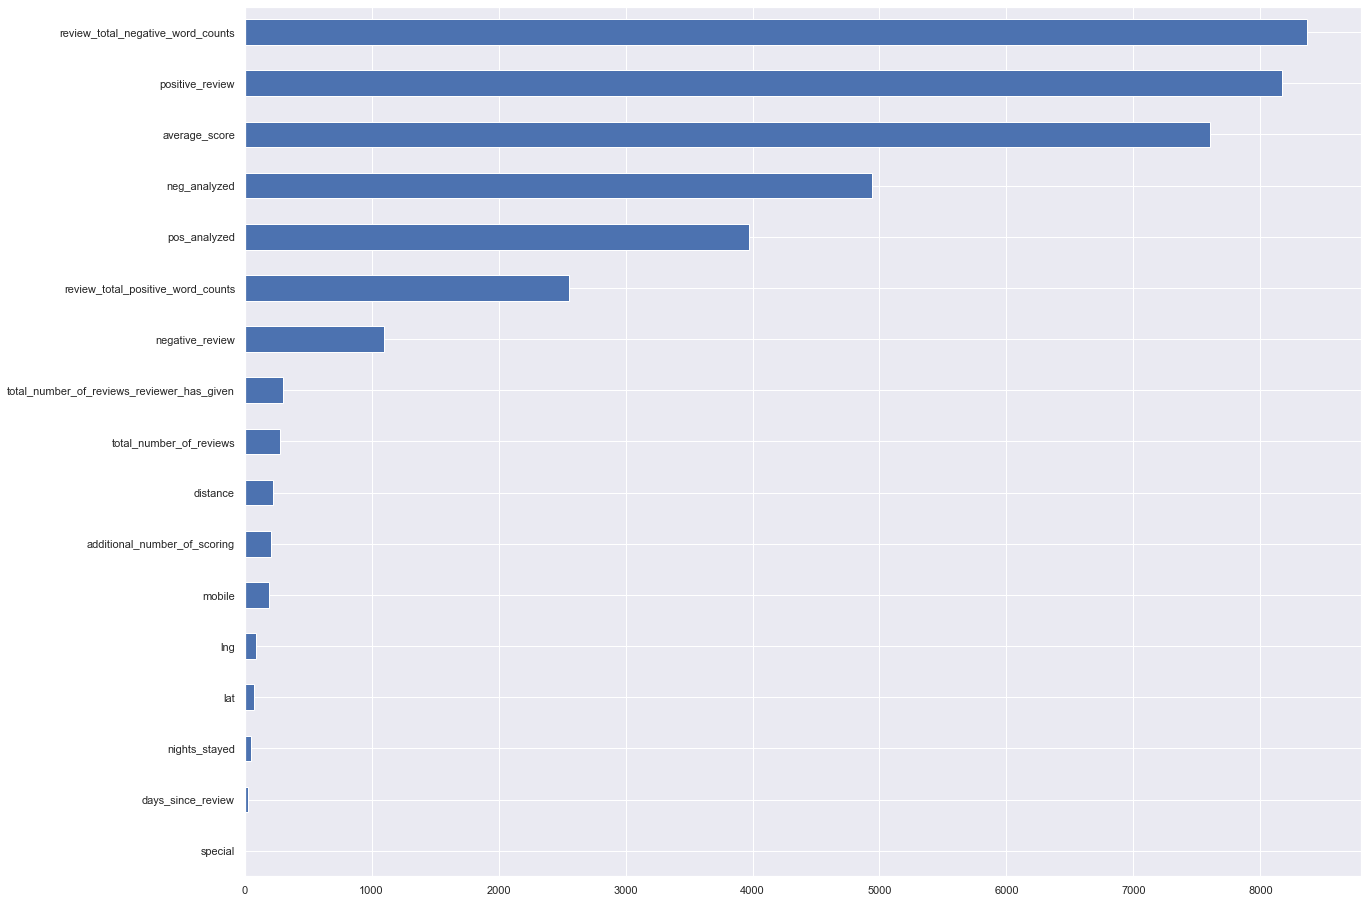

In [223]:
imp_num = pd.Series(f_classif(X[num_cols], y1)[0], index = num_cols)
imp_num.sort_values(ascending=True, inplace=True)
display(imp_num)
imp_num.plot(kind = 'barh')

<AxesSubplot:>

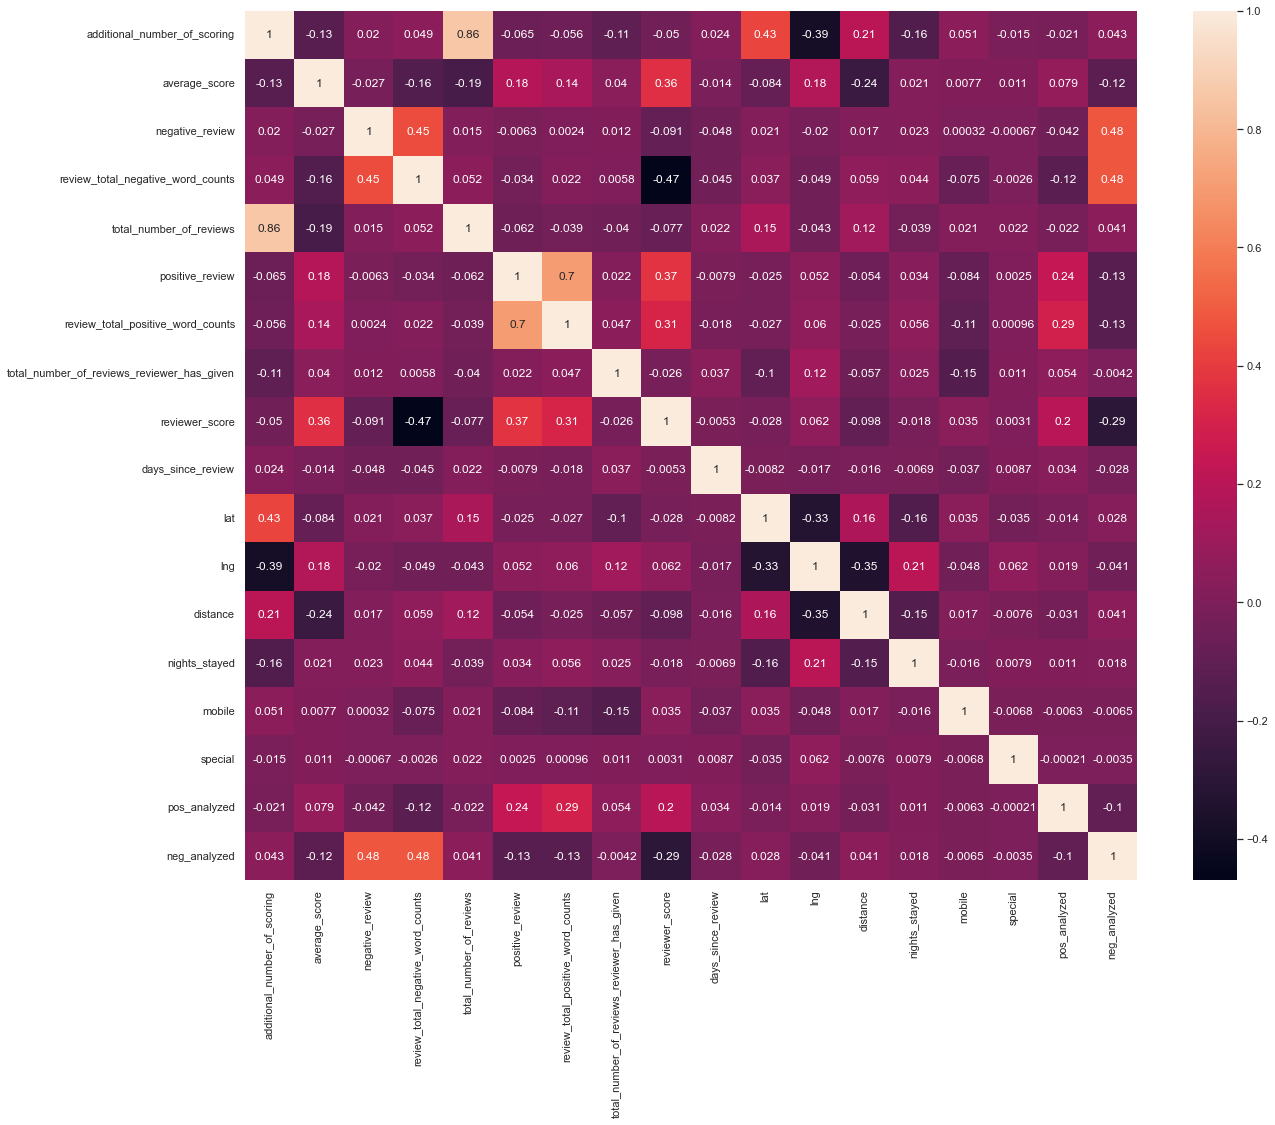

In [224]:
sns.set(rc = {'figure.figsize':(20,16)})
sns.heatmap(hotdf.corr(method='spearman'), annot=True)

In [225]:
hot_corr = hotdf.corr(method='spearman')
tresh = 0.7

for ind in hot_corr.index:
    for col in hot_corr.columns:
        if (hot_corr.loc[ind, col] > tresh) & (ind != col):
            print(round(hot_corr.loc[ind, col], 3), ind, col)


0.859 additional_number_of_scoring total_number_of_reviews
0.859 total_number_of_reviews additional_number_of_scoring
0.702 positive_review review_total_positive_word_counts
0.702 review_total_positive_word_counts positive_review


In [226]:
hotdf.drop(columns=['additional_number_of_scoring', 'lat', 'lng', 'nights_stayed', 'days_since_review', 'special'], axis=1, inplace=True)

In [227]:
bin_encoder_1 = ce.BinaryEncoder(cols='hotel_name')
type_bin_1 = bin_encoder_1.fit_transform(hotdf['hotel_name'])
hotdf = pd.concat([hotdf, type_bin_1], axis=1)

hotdf = pd.get_dummies(hotdf, columns=['city'])
hotdf = pd.get_dummies(hotdf, columns=['reviewer_nationality'])
hotdf = pd.get_dummies(hotdf, columns=['weekday'])
hotdf = pd.get_dummies(hotdf, columns=['month'])
hotdf = pd.get_dummies(hotdf, columns=['travel_type'])
hotdf = pd.get_dummies(hotdf, columns=['vis_type'])
hotdf = pd.get_dummies(hotdf, columns=['roomtype'])

hotdf = hotdf.select_dtypes(include=['float64', 'int64', 'uint8'])
hotdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 79 columns):
 #   Column                                          Non-Null Count   Dtype  
---  ------                                          --------------   -----  
 0   average_score                                   386803 non-null  float64
 1   negative_review                                 386803 non-null  float64
 2   review_total_negative_word_counts               386803 non-null  int64  
 3   total_number_of_reviews                         386803 non-null  int64  
 4   positive_review                                 386803 non-null  float64
 5   review_total_positive_word_counts               386803 non-null  int64  
 6   total_number_of_reviews_reviewer_has_given      386803 non-null  int64  
 7   reviewer_score                                  386803 non-null  float64
 8   distance                                        386803 non-null  float64
 9   mobile                    

In [228]:
cat_cols = list(set(hotdf.columns).difference(set(num_cols)).difference({'reviewer_score'}))
cat_cols

['reviewer_nationality_Israel ',
 'reviewer_nationality_Turkey ',
 'month_April',
 'hotel_name_7',
 'hotel_name_3',
 'hotel_name_5',
 'travel_type_no type',
 'reviewer_nationality_Belgium ',
 'city_Vienna',
 'reviewer_nationality_United States of America ',
 'reviewer_nationality_Saudi Arabia ',
 'roomtype_two rooms',
 'reviewer_nationality_Australia ',
 'city_Paris',
 'hotel_name_1',
 'month_August',
 'vis_type_solo traveler',
 'month_July',
 'reviewer_nationality_Germany ',
 'reviewer_nationality_Switzerland ',
 'month_January',
 'city_Milan',
 'hotel_name_8',
 'hotel_name_4',
 'hotel_name_10',
 'vis_type_group',
 'month_October',
 'travel_type_business trip',
 'reviewer_nationality_United Arab Emirates ',
 'weekday_Saturday',
 'reviewer_nationality_Ireland ',
 'city_London',
 'weekday_Wednesday',
 'weekday_Friday',
 'reviewer_nationality_France ',
 'reviewer_nationality_Other',
 'month_February',
 'travel_type_leisure trip',
 'roomtype_other',
 'weekday_Sunday',
 'hotel_name_0',
 'w

weekday_Wednesday      6.967014
weekday_Tuesday       77.674273
weekday_Thursday      56.359665
weekday_Sunday         6.540295
weekday_Saturday      26.768910
                        ...    
city_Paris            88.120269
city_Milan            94.623719
city_London          537.769510
city_Barcelona       433.015396
city_Amsterdam       130.662870
Length: 67, dtype: float64

<AxesSubplot:>

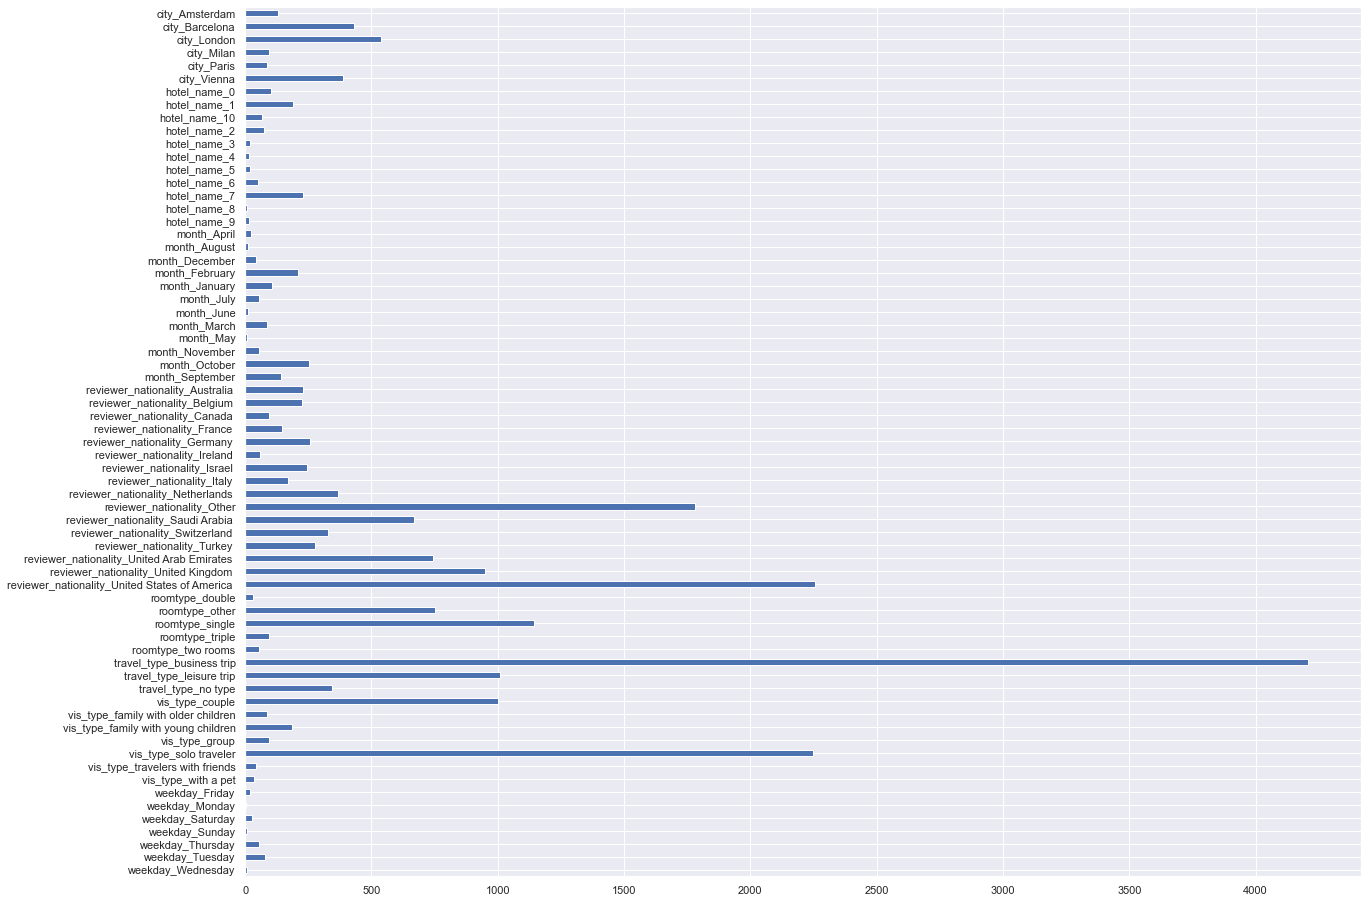

In [229]:
X = hotdf.drop(['reviewer_score'], axis = 1)  
y = hotdf['reviewer_score']
y1 = y.astype('int')

imp_cat = pd.Series(chi2(X[cat_cols], y1)[0], index=cat_cols)
imp_cat.sort_index(ascending=False, inplace=True)
display(imp_cat)
imp_cat.plot(kind = 'barh')


In [230]:
hotdf.drop(columns=['hotel_name_0', 'hotel_name_1', 'hotel_name_2', 'hotel_name_3', 'hotel_name_4', 'hotel_name_5', 'hotel_name_6', 'hotel_name_7', 'hotel_name_8', 'hotel_name_9', 'hotel_name_10'], axis=1, inplace=True)
hotdf.drop(columns=['weekday_Monday', 'weekday_Tuesday', 'weekday_Wednesday', 'weekday_Thursday', 'weekday_Friday', 'weekday_Saturday', 'weekday_Sunday'], axis=1, inplace=True)
hotdf.drop(columns=['month_January', 'month_February', 'month_March', 'month_April', 'month_May', 'month_June'], axis=1, inplace=True)
hotdf.drop(columns=['month_July', 'month_August', 'month_September', 'month_October', 'month_November', 'month_December'], axis=1, inplace=True)

hotdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 49 columns):
 #   Column                                          Non-Null Count   Dtype  
---  ------                                          --------------   -----  
 0   average_score                                   386803 non-null  float64
 1   negative_review                                 386803 non-null  float64
 2   review_total_negative_word_counts               386803 non-null  int64  
 3   total_number_of_reviews                         386803 non-null  int64  
 4   positive_review                                 386803 non-null  float64
 5   review_total_positive_word_counts               386803 non-null  int64  
 6   total_number_of_reviews_reviewer_has_given      386803 non-null  int64  
 7   reviewer_score                                  386803 non-null  float64
 8   distance                                        386803 non-null  float64
 9   mobile                    

In [232]:
# Загружаем специальный инструмент для разбивки:  
from sklearn.model_selection import train_test_split  

X = hotdf.drop(['reviewer_score'], axis = 1)  
y = hotdf['reviewer_score']

# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.  
# Для тестирования мы будем использовать 25% от исходного датасета.  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Импортируем необходимые библиотеки:  
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели  
from sklearn import metrics # инструменты для оценки точности модели  

# Создаём модель  
regr = RandomForestRegressor(n_estimators=100)  
      
# Обучаем модель на тестовом наборе данных  
regr.fit(X_train, y_train)  
      
# Используем обученную модель для предсказания рейтинга отелей в тестовой выборке.  
# Предсказанные значения записываем в переменную y_pred  
y_pred = regr.predict(X_test)  

# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они отличаются  
# Метрика называется Mean Absolute Percentage Error (MAPE) и показывает среднюю абсолютную процентную ошибку предсказанных значений от фактических.  
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, y_pred))

MAPE: 0.12309079942827465
